# Introduction

## **Analysis Title: Predicting Anime Ratings for Streaming Platform Content Selection**

![My Image](1296029.png)

I am thrilled to present this milestone project focusing on the prediction of anime ratings, specifically tailored to meet the needs of streaming platforms and broadcasting channels. In today's competitive landscape, data-driven decision-making is paramount, and this analysis aims to provide actionable insights to enhance content selection strategies.

**Problem Statement**

Anime faces a myriad of challenges in today's dynamic entertainment industry. From fierce competition to shifting viewer preferences, understanding the factors that influence popularity is crucial for success. Questions arise: What truly drives popularity? Is it the studio behind the animation, the genre of the series, or perhaps the dedicated fanbase? These are the pressing questions that this analysis seeks to address, offering valuable insights into the key drivers of anime success.

**Objective**

The primary objective of this project is to develop robust regression models capable of accurately predicting the ratings of anime series. By leveraging advanced machine learning algorithms such as Support Vector Regressor (SVR), K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and XGBoost, we seek to empower streaming platforms and broadcasting channels with predictive capabilities to optimize their content portfolios.

**Potential Users**

- Streaming Platforms and Broadcasting Channels: As key players in the entertainment industry, streaming platforms and broadcasting channels rely on engaging content to attract and retain audiences. By integrating our predictive models into their decision-making processes, these platforms can strategically curate their anime offerings, leading to improved viewer engagement, retention, and ultimately, business growth.

- Manga/Manhwa Artists: For manga and manhwa artists looking to transition their artwork into animated content, our analysis offers invaluable insights. By setting KPIs focused on audience engagement metrics such as the number of members adding their animations to their watchlists and favorites within the HuggingFace application, artists can gauge the potential popularity and reception of their creations, guiding their content development and marketing strategies.

We are excited about the possibilities that this analysis presents and look forward to collaborating with stakeholders to unlock the full potential of anime content selection.

Column Description:

|Column|Description|
|---|---|
anime_id| Unique ID for each anime.
Name| The name of the anime in its original language.
English name| The English name of the anime.
Other name| Native name or title of the anime(can be in Japanese, Chinese or Korean).
Score| The score or rating given to the anime.
Genres| The genres of the anime, separated by commas.
Synopsis| A brief description or summary of the anime's plot.
Type| The type of the anime (e.g., TV series, movie, OVA, etc.).
Episodes| The number of episodes in the anime.
Aired| The dates when the anime was aired.
Premiered| The season and year when the anime premiered.
Status| The status of the anime (e.g., Finished Airing, Currently Airing, etc.).
Producers| The production companies or producers of the anime.
Licensors| The licensors of the anime (e.g., streaming platforms).
Studios| The animation studios that worked on the anime.
Source| The source material of the anime (e.g., manga, light novel, original).
Duration| The duration of each episode.
Rating| The age rating of the anime.
Rank| The rank of the anime based on popularity or other criteria.
Popularity| The popularity rank of the anime.
Favorites| The number of times the anime was marked as a favorite by users.
Scored By| The number of users who scored the anime.
Members| The number of members who have added the anime to their list on the platform.
Image URL| The URL of the anime's image or poster.

# Import Libraries

importing necessary libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from scipy.stats import randint
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from feature_engine.outliers import Winsorizer

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')


# Data Loading

loading the dataset

In [5]:
df = pd.read_csv('anime-dataset-2023.csv')

df.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


Identifying unknown value

In [6]:
# Create a dictionary to store the counts
value_counts = {'NaN': 0, 'null': 0, 'UNKNOWN': 0, 'unknown' : 0}

# Check for NaN, null, and 'Unknown' values in all columns
for column in df.columns:
    nan_values_1 = df[df[column].isna()]
    value_counts['NaN'] += nan_values_1.shape[0]

    null_values = df[df[column].isnull()]
    value_counts['null'] += null_values.shape[0]

    unknown_values = df[df[column] == 'UNKNOWN']
    value_counts['UNKNOWN'] += unknown_values.shape[0]
    
    nan_values = df[df[column] == 'nan']
    value_counts['unknown'] += nan_values.shape[0]

# Calculate the total count of missing values
total_missing_count = sum(value_counts.values())

# Calculate the percentage of missing values relative to the total data
percentage_missing = (total_missing_count / df.size) * 100

# Print the counts and percentage
print("Values count:")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print(f"\nTotal counts: {total_missing_count}")
print(f"Percentage of missing values: {percentage_missing:.2f}%")

Values count:
NaN: 0
null: 0
UNKNOWN: 107471
unknown: 0

Total counts: 107471
Percentage of missing values: 17.98%


Changing each unknown value into a new representative string

In [7]:
### change all nan null unknown to missing values

missing_value_placeholder = 'YOW MISSING MAS BRO'

# Replace NaN, null, and 'Unknown' values with the common placeholder
df.fillna(missing_value_placeholder, inplace=True)
df.replace(['UNKNOWN', 'null', 'nan'], missing_value_placeholder, inplace=True)

# Check the DataFrame after replacement
df

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,YOW MISSING MAS BRO,无脑魔女,YOW MISSING MAS BRO,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,YOW MISSING MAS BRO,Web manga,Unknown,PG-13 - Teens 13 or older,YOW MISSING MAS BRO,24723,0,YOW MISSING MAS BRO,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,YOW MISSING MAS BRO,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,YOW MISSING MAS BRO,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,YOW MISSING MAS BRO,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,YOW MISSING MAS BRO,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,YOW MISSING MAS BRO,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,YOW MISSING MAS BRO,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,YOW MISSING MAS BRO,僕らの最終戦争,YOW MISSING MAS BRO,YOW MISSING MAS BRO,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,YOW MISSING MAS BRO,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,YOW MISSING MAS BRO,0,https://cdn.myanimelist.net/images/anime/1931/...


counting the unknown value and how much it covers the whole dataset

In [8]:
# Count the occurrences of 'YOW MISSING MAS BRO'
yow_missing_count = (df == missing_value_placeholder).sum().sum()

# Calculate the percentage of 'YOW MISSING MAS BRO' values relative to the total data
percentage_yow_missing = (yow_missing_count / df.size) * 100

# Print the counts and percentage
print(f"\nCount of 'YOW MISSING MAS BRO' values: {yow_missing_count}")
print(f"Percentage of 'YOW MISSING MAS BRO' values: {percentage_yow_missing:.2f}%")


Count of 'YOW MISSING MAS BRO' values: 107471
Percentage of 'YOW MISSING MAS BRO' values: 17.98%


Checking rows containing unknown values

In [9]:
missing_rows_count = (df == 'YOW MISSING MAS BRO').any(axis=1).sum()

# Calculate the percentage of rows with 'YOW MISSING MAS BRO' values relative to the total rows
percentage_missing_rows = (missing_rows_count / df.shape[0]) * 100

# Print the counts and percentage
print(f"\nNumber of rows containing 'YOW MISSING MAS BRO': {missing_rows_count}")
print(f"Percentage of rows with 'YOW MISSING MAS BRO': {percentage_missing_rows:.2f}%")


Number of rows containing 'YOW MISSING MAS BRO': 23051
Percentage of rows with 'YOW MISSING MAS BRO': 92.56%


counting each column rows containing unknown values

In [10]:
# Calculate the percentage of 'YOW MISSING MAS BRO' values in each column
missing_values_percentage_per_column = (df == 'YOW MISSING MAS BRO').mean() * 100

# Sort columns based on the percentage of 'YOW MISSING MAS BRO' values in descending order
sorted_columns_percentage = missing_values_percentage_per_column.sort_values(ascending=False)

# Display the sorted columns and their respective percentages
for column, percentage in sorted_columns_percentage.items():
    print(f"{column}: {percentage:.2f}%")

Licensors: 80.99%
Premiered: 77.89%
English name: 58.53%
Producers: 53.60%
Studios: 42.26%
Score: 36.99%
Scored By: 36.99%
Genres: 19.79%
Rank: 18.52%
Rating: 2.69%
Episodes: 2.45%
Other name: 0.51%
Type: 0.30%
Members: 0.00%
Favorites: 0.00%
Popularity: 0.00%
anime_id: 0.00%
Duration: 0.00%
Source: 0.00%
Name: 0.00%
Status: 0.00%
Aired: 0.00%
Synopsis: 0.00%
Image URL: 0.00%


Dropping unnecessary files (including the ones with high amount of unknown value) for accurate analysis and reducing columns that are considered irrelevant

In [11]:
df.drop(['anime_id', 'Duration', 'Synopsis', 'Licensors', 'Premiered', 'English name', 'Producers', 'Rating', 'Episodes', 'Other name', 'Type', 'Image URL'], axis=1, inplace=True)

df

,Name,Score,Genres,Aired,Status,Studios,Source,Rank,Popularity,Favorites,Scored By,Members
0,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,41.0,43,78525,914193.0,1771505
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Sep 1, 2001",Finished Airing,Bones,Original,189.0,602,1448,206248.0,360978
2,Trigun,8.22,"Action, Adventure, Sci-Fi","Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,328.0,246,15035,356739.0,727252
3,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural","Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,2764.0,1795,613,42829.0,111931
4,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural","Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,4240.0,5126,14,6413.0,15001
...,...,...,...,...,...,...,...,...,...,...,...,...
24900,Wu Nao Monu,YOW MISSING MAS BRO,"Comedy, Fantasy, Slice of Life","Jul 4, 2023 to ?",Not yet aired,YOW MISSING MAS BRO,Web manga,YOW MISSING MAS BRO,24723,0,YOW MISSING MAS BRO,0
24901,Bu Xing Si: Yuan Qi,YOW MISSING MAS BRO,"Action, Adventure, Fantasy","Jul 27, 2023 to ?",Not yet aired,YOW MISSING MAS BRO,Web novel,0.0,0,0,YOW MISSING MAS BRO,0
24902,Di Yi Xulie,YOW MISSING MAS BRO,"Action, Adventure, Fantasy, Sci-Fi","Jul 19, 2023 to ?",Finished Airing,YOW MISSING MAS BRO,Web novel,0.0,0,0,YOW MISSING MAS BRO,0
24903,Bokura no Saishuu Sensou,YOW MISSING MAS BRO,YOW MISSING MAS BRO,"Apr 23, 2022",Finished Airing,YOW MISSING MAS BRO,Original,0.0,0,0,YOW MISSING MAS BRO,0


identifying data duplicates

In [12]:
kagebunshin = df.duplicated().sum()

if kagebunshin == 0:
  print("Aman data nya ga ada kagebunshin")
else:
  print(f'Cuk ini kagenbunshin nya ada {kagebunshin} biji')

Aman data nya ga ada kagebunshin


Checking the newly filtered columns

In [13]:
df.columns

Index(['Name', 'Score', 'Genres', 'Aired', 'Status', 'Studios', 'Source',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members'],
      dtype='object')

checking the data type

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        24905 non-null  object
 1   Score       24905 non-null  object
 2   Genres      24905 non-null  object
 3   Aired       24905 non-null  object
 4   Status      24905 non-null  object
 5   Studios     24905 non-null  object
 6   Source      24905 non-null  object
 7   Rank        24905 non-null  object
 8   Popularity  24905 non-null  int64 
 9   Favorites   24905 non-null  int64 
 10  Scored By   24905 non-null  object
 11  Members     24905 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 2.3+ MB


# Exploratory Data Analysis (EDA)


Creating a copy of dataset for EDA purposes

In [15]:
df_eda = df.copy()

df_eda.head()

,Name,Score,Genres,Aired,Status,Studios,Source,Rank,Popularity,Favorites,Scored By,Members
0,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,41.0,43,78525,914193.0,1771505
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Sep 1, 2001",Finished Airing,Bones,Original,189.0,602,1448,206248.0,360978
2,Trigun,8.22,"Action, Adventure, Sci-Fi","Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,328.0,246,15035,356739.0,727252
3,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural","Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,2764.0,1795,613,42829.0,111931
4,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural","Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,4240.0,5126,14,6413.0,15001


Implementing 1NF normalization in the dataset for genre

In [16]:
# Split the 'Genres' column on commas and expand it into separate columns
genres_df = df_eda['Genres'].str.split(', ', expand=True)

# Rename the columns to Main Genre, Sub-genre1, Sub-genre2, etc.
genres_df.columns = [f'Main Genre' if i == 0 else f'Sub-genre{i}' for i in range(genres_df.shape[1])]

# Concatenate the genres DataFrame with the original DataFrame
normalized_df = pd.concat([df_eda, genres_df], axis=1)

# Drop the original 'Genres' column
normalized_df.drop(columns=['Genres'], inplace=True)

normalized_df.fillna("No Sub-Genre",inplace=True)
normalized_df.head()

,Name,Score,Aired,Status,Studios,Source,Rank,Popularity,Favorites,Scored By,Members,Main Genre,Sub-genre1,Sub-genre2,Sub-genre3,Sub-genre4,Sub-genre5,Sub-genre6,Sub-genre7,Sub-genre8
0,Cowboy Bebop,8.75,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,41.0,43,78525,914193.0,1771505,Action,Award Winning,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Sep 1, 2001",Finished Airing,Bones,Original,189.0,602,1448,206248.0,360978,Action,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre
2,Trigun,8.22,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,328.0,246,15035,356739.0,727252,Action,Adventure,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre
3,Witch Hunter Robin,7.25,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,2764.0,1795,613,42829.0,111931,Action,Drama,Mystery,Supernatural,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre
4,Bouken Ou Beet,6.94,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,4240.0,5126,14,6413.0,15001,Adventure,Fantasy,Supernatural,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre


filtering out inappropriate genres and the unknown value

In [17]:
# Define the list of inappropriate genres
inappropriate_genres = ['YOW MISSING MAS BRO', 'Hentai', 'Boys Love', 'Ecchi', 'Girls Love', 'Erotica']

# Drop rows containing inappropriate genres
filtered_df = normalized_df[~normalized_df['Main Genre'].str.contains('|'.join(inappropriate_genres))]

# Display the value counts after filtering
filtered_df['Main Genre'].value_counts()

Main Genre
Comedy           5140
Action           4730
Adventure        2269
Fantasy          1683
Drama            1470
Avant Garde       781
Slice of Life     656
Sci-Fi            419
Sports            399
Romance           307
Horror            168
Mystery           162
Supernatural      160
Award Winning     151
Gourmet            51
Suspense           17
Name: count, dtype: int64

Bar Chart displaying the count of anime using each main genre

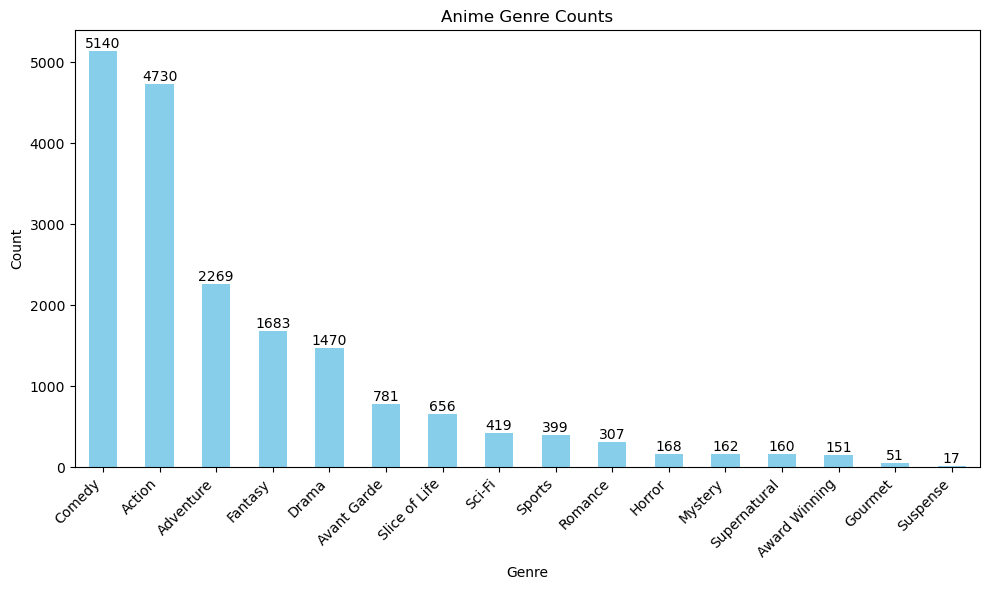

In [18]:
# Count the occurrences of each main genre
genre_counts = filtered_df['Main Genre'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = genre_counts.plot(kind='bar', color='skyblue')
plt.title('Anime Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for i, v in enumerate(genre_counts):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

replacing datatype that contains unknown

In [19]:
filtered_df['Score'] = filtered_df['Score'].replace('YOW MISSING MAS BRO', 0.0)
filtered_df['Scored By'] = filtered_df['Scored By'].replace('YOW MISSING MAS BRO', 0.0)

filtered_df.tail()

,Name,Score,Aired,Status,Studios,Source,Rank,Popularity,Favorites,Scored By,Members,Main Genre,Sub-genre1,Sub-genre2,Sub-genre3,Sub-genre4,Sub-genre5,Sub-genre6,Sub-genre7,Sub-genre8
24898,Thailand,0.0,"Jul 3, 2014",Finished Airing,YOW MISSING MAS BRO,Original,0.0,0,0,0.0,0,Avant Garde,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre
24899,Energy,0.0,"Feb 11, 2015",Finished Airing,YOW MISSING MAS BRO,Original,0.0,0,0,0.0,0,Avant Garde,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre
24900,Wu Nao Monu,0.0,"Jul 4, 2023 to ?",Not yet aired,YOW MISSING MAS BRO,Web manga,YOW MISSING MAS BRO,24723,0,0.0,0,Comedy,Fantasy,Slice of Life,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre
24901,Bu Xing Si: Yuan Qi,0.0,"Jul 27, 2023 to ?",Not yet aired,YOW MISSING MAS BRO,Web novel,0.0,0,0,0.0,0,Action,Adventure,Fantasy,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre
24902,Di Yi Xulie,0.0,"Jul 19, 2023 to ?",Finished Airing,YOW MISSING MAS BRO,Web novel,0.0,0,0,0.0,0,Action,Adventure,Fantasy,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre


Converting the necessary columns into float for EDA purposes

In [20]:
filtered_df['Score'] = filtered_df['Score'].astype(float)
filtered_df['Scored By'] = filtered_df['Scored By'].astype(float)

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18563 entries, 0 to 24902
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        18563 non-null  object 
 1   Score       18563 non-null  float64
 2   Aired       18563 non-null  object 
 3   Status      18563 non-null  object 
 4   Studios     18563 non-null  object 
 5   Source      18563 non-null  object 
 6   Rank        18563 non-null  object 
 7   Popularity  18563 non-null  int64  
 8   Favorites   18563 non-null  int64  
 9   Scored By   18563 non-null  float64
 10  Members     18563 non-null  int64  
 11  Main Genre  18563 non-null  object 
 12  Sub-genre1  18563 non-null  object 
 13  Sub-genre2  18563 non-null  object 
 14  Sub-genre3  18563 non-null  object 
 15  Sub-genre4  18563 non-null  object 
 16  Sub-genre5  18563 non-null  object 
 17  Sub-genre6  18563 non-null  object 
 18  Sub-genre7  18563 non-null  object 
 19  Sub-genre8  18563 non-null  ob

Classify each score threshold and group them into one dataframe

In [21]:
grade = []

for score in filtered_df['Score']:
    if score == 0:
        grade.append("Not rated yet")
    elif score >= 8.0:
        grade.append("Highly Rated")
    elif 7.0 <= score < 8.0:
        grade.append("Well Received")
    elif 6.0 <= score < 7.0:
        grade.append("Average")
    else:
        grade.append("Poorly Rated")


score_df = pd.DataFrame({
    'Anime Score': filtered_df['Score'],
    'Score Group' : grade
})

score_df

,Anime Score,Score Group
0,8.75,Highly Rated
1,8.38,Highly Rated
2,8.22,Highly Rated
3,7.25,Well Received
4,6.94,Average
...,...,...
24898,0.00,Not rated yet
24899,0.00,Not rated yet
24900,0.00,Not rated yet
24901,0.00,Not rated yet


creating a pie chart based on the classifier

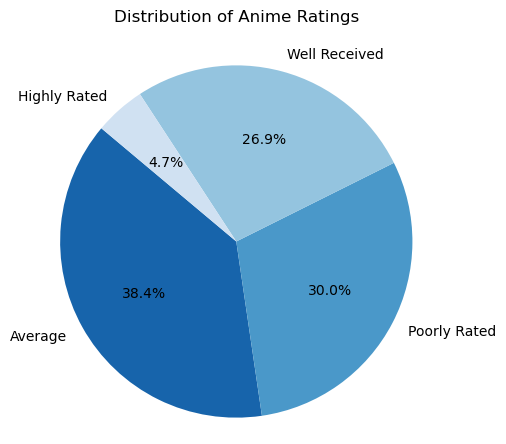

In [22]:
satisfaction_count = score_df['Score Group'].value_counts()

# Filter out the "Not rated yet" category
satisfaction_count_filtered = satisfaction_count[~satisfaction_count.index.str.contains('Not rated yet')]

# Generate a color palette for the remaining categories
color_palette = sns.color_palette("Blues_r", len(satisfaction_count_filtered))

# Plot the pie chart with filtered data
plt.figure(figsize=(5, 5))
plt.pie(satisfaction_count_filtered, labels=satisfaction_count_filtered.index, autopct='%1.1f%%', startangle=140, colors=color_palette)
plt.title('Distribution of Anime Ratings', pad=20)
plt.axis('equal')
plt.show()


Finding correlation between anime scores and the number of members who include their animes in the list

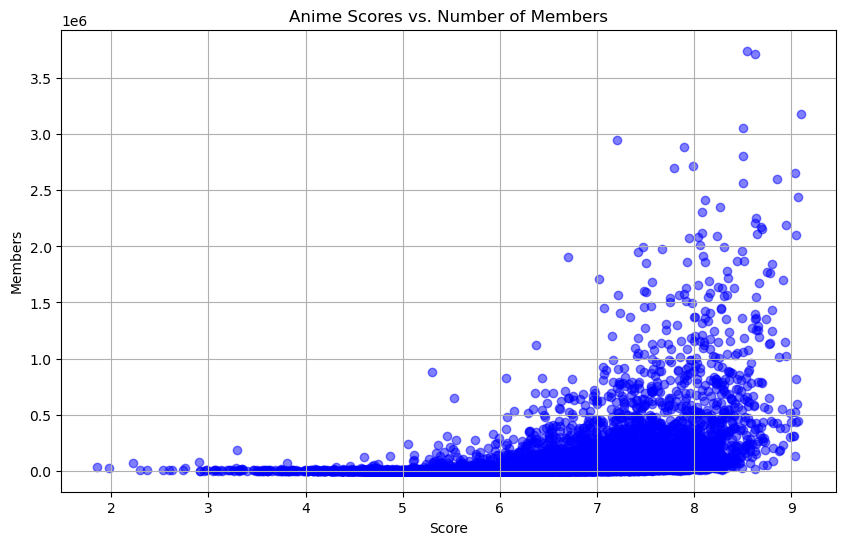

In [23]:
# Filter out data points with score of 0 or 0 members
filtered_scores = filtered_df[(filtered_df['Score'] != 0) & (filtered_df['Members'] != 0)]['Score']
filtered_members = filtered_df[(filtered_df['Score'] != 0) & (filtered_df['Members'] != 0)]['Members']

# Create a scatter plot with filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_scores, filtered_members, color='blue', alpha=0.5)
plt.title('Anime Scores vs. Number of Members')
plt.xlabel('Score')
plt.ylabel('Members')
plt.grid(True)
plt.show()


Extracting the year released from the aired column

In [24]:
# Parse the 'Aired' column to extract the release year and month
filtered_df['Year Released'] = filtered_df['Aired'].apply(lambda x: pd.to_datetime(x.split(' to ')[0], errors='coerce').year 
                                        if 'to' in x else pd.to_datetime(x, format='%b %Y', errors='coerce').year)
filtered_df['Month Released'] = filtered_df['Aired'].apply(lambda x: pd.to_datetime(x.split(' to ')[0], errors='coerce').month 
                                        if 'to' in x else pd.to_datetime(x, format='%b %Y', errors='coerce').month)

filtered_df


,Name,Score,Aired,Status,Studios,Source,Rank,Popularity,Favorites,Scored By,...,Sub-genre1,Sub-genre2,Sub-genre3,Sub-genre4,Sub-genre5,Sub-genre6,Sub-genre7,Sub-genre8,Year Released,Month Released
0,Cowboy Bebop,8.75,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,41.0,43,78525,914193.0,...,Award Winning,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,1998.0,4.0
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Sep 1, 2001",Finished Airing,Bones,Original,189.0,602,1448,206248.0,...,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,NaN,NaN
2,Trigun,8.22,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,328.0,246,15035,356739.0,...,Adventure,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,1998.0,4.0
3,Witch Hunter Robin,7.25,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,2764.0,1795,613,42829.0,...,Drama,Mystery,Supernatural,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,2002.0,7.0
4,Bouken Ou Beet,6.94,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,4240.0,5126,14,6413.0,...,Fantasy,Supernatural,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,2004.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24898,Thailand,0.00,"Jul 3, 2014",Finished Airing,YOW MISSING MAS BRO,Original,0.0,0,0,0.0,...,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,NaN,NaN
24899,Energy,0.00,"Feb 11, 2015",Finished Airing,YOW MISSING MAS BRO,Original,0.0,0,0,0.0,...,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,NaN,NaN
24900,Wu Nao Monu,0.00,"Jul 4, 2023 to ?",Not yet aired,YOW MISSING MAS BRO,Web manga,YOW MISSING MAS BRO,24723,0,0.0,...,Fantasy,Slice of Life,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,2023.0,7.0
24901,Bu Xing Si: Yuan Qi,0.00,"Jul 27, 2023 to ?",Not yet aired,YOW MISSING MAS BRO,Web novel,0.0,0,0,0.0,...,Adventure,Fantasy,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,2023.0,7.0


Creating pie chart to explain the average score per month

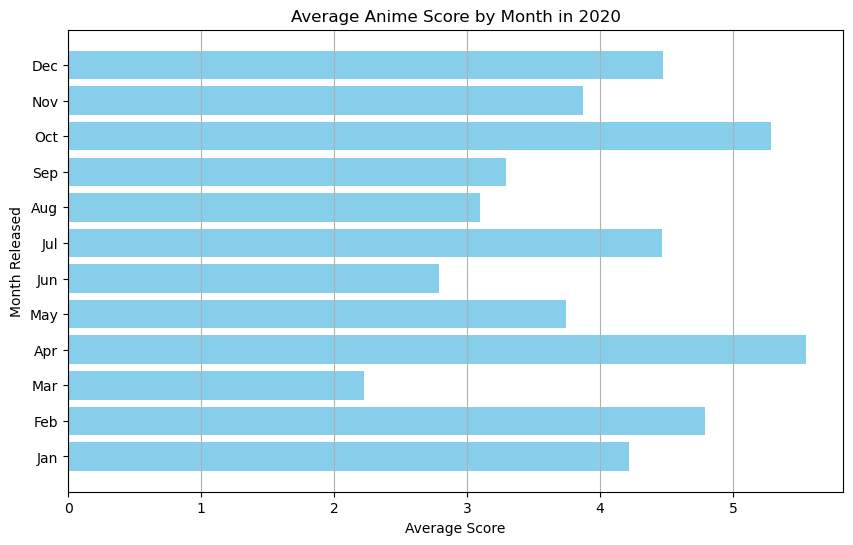

In [25]:
import calendar

# Filter out entries with unknown release years
new_df = filtered_df[filtered_df['Year Released'].notna()]

# Filter out entries with release years outside the range from 2022 to 2022
new_df = new_df[(new_df['Year Released'] >= 2020) & (new_df['Year Released'] <= 2020)]

# Group the DataFrame by month and calculate the average score for each month
monthly_avg_score = new_df.groupby('Month Released')['Score'].mean()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(monthly_avg_score.index, monthly_avg_score.values, color='skyblue')
plt.title('Average Anime Score by Month in 2020')
plt.xlabel('Average Score')
plt.ylabel('Month Released')
plt.yticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])
plt.grid(axis='x')

plt.show()


Encoding the genre for correlation purposes

In [26]:
genre_frequency = {
    'Comedy': 1,
    'Action': 2,
    'Adventure': 3,
    'Fantasy': 4,
    'Drama': 5,
    'Avant Garde': 6,
    'Slice of Life': 7,
    'Sci-Fi': 8,
    'Sports': 9,
    'Romance': 10,
    'Horror': 11,
    'Mystery': 12,
    'Supernatural': 13,
    'Award Winning': 14,
    'Gourmet': 15,
    'Suspense': 16
}

# Apply ordinal encoding to the 'Genres' column
encoded_df = filtered_df.copy()  # Create a copy of the original DataFrame to avoid modifying it directly
encoded_df['Main Genre'] = encoded_df['Main Genre'].replace(genre_frequency)

# Display the encoded DataFrame
print("Encoded DataFrame:")
encoded_df.head()

Encoded DataFrame:


,Name,Score,Aired,Status,Studios,Source,Rank,Popularity,Favorites,Scored By,...,Sub-genre1,Sub-genre2,Sub-genre3,Sub-genre4,Sub-genre5,Sub-genre6,Sub-genre7,Sub-genre8,Year Released,Month Released
0,Cowboy Bebop,8.75,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,41.0,43,78525,914193.0,...,Award Winning,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,1998.0,4.0
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Sep 1, 2001",Finished Airing,Bones,Original,189.0,602,1448,206248.0,...,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,NaN,NaN
2,Trigun,8.22,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,328.0,246,15035,356739.0,...,Adventure,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,1998.0,4.0
3,Witch Hunter Robin,7.25,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,2764.0,1795,613,42829.0,...,Drama,Mystery,Supernatural,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,2002.0,7.0
4,Bouken Ou Beet,6.94,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,4240.0,5126,14,6413.0,...,Fantasy,Supernatural,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,2004.0,9.0


Creating heatmap to find each columns' correlation

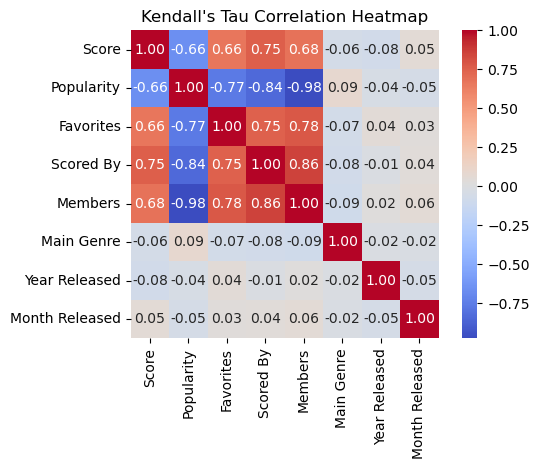

In [27]:

numeric_df = encoded_df.select_dtypes(include=['float64', 'int64'])


# Calculate the correlation matrix using Kendall's tau
correlation_matrix = numeric_df.corr(method='kendall')

# Plot heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Kendall's Tau Correlation Heatmap")
plt.show()


## Insights Derived from Exploratory Data Analysis (EDA):

- Only 26% of the anime are considered well-received (rated between 7 and 8 out of 10), with 4% receiving high ratings (above 8), indicating that a significant portion of the anime in the database is deemed "okay" by the community.

- The scatter plot suggests a positive correlation between anime ratings and the number of members who have included each anime in their list.

- Comedy and Action are the most frequently aired anime genres, with Comedy having 5140 anime counted and Action with 4730 anime counted.

- The average anime score in 2020 appears concerning, with the highest average score being above 5, indicating that most anime released in 2020 are poorly received by the community.

- According to the Kendall Tau correlation heatmap, the features "Favorites," "Scored By," and "Members" exhibit the highest correlations compared to all other columns.

# Feature Engineering


## Train-test Split

Creating a copy for train test purposes

In [28]:
df2 = filtered_df.copy()

df2

,Name,Score,Aired,Status,Studios,Source,Rank,Popularity,Favorites,Scored By,...,Sub-genre1,Sub-genre2,Sub-genre3,Sub-genre4,Sub-genre5,Sub-genre6,Sub-genre7,Sub-genre8,Year Released,Month Released
0,Cowboy Bebop,8.75,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,41.0,43,78525,914193.0,...,Award Winning,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,1998.0,4.0
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Sep 1, 2001",Finished Airing,Bones,Original,189.0,602,1448,206248.0,...,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,NaN,NaN
2,Trigun,8.22,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,328.0,246,15035,356739.0,...,Adventure,Sci-Fi,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,1998.0,4.0
3,Witch Hunter Robin,7.25,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,2764.0,1795,613,42829.0,...,Drama,Mystery,Supernatural,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,2002.0,7.0
4,Bouken Ou Beet,6.94,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,4240.0,5126,14,6413.0,...,Fantasy,Supernatural,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,2004.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24898,Thailand,0.00,"Jul 3, 2014",Finished Airing,YOW MISSING MAS BRO,Original,0.0,0,0,0.0,...,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,NaN,NaN
24899,Energy,0.00,"Feb 11, 2015",Finished Airing,YOW MISSING MAS BRO,Original,0.0,0,0,0.0,...,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,NaN,NaN
24900,Wu Nao Monu,0.00,"Jul 4, 2023 to ?",Not yet aired,YOW MISSING MAS BRO,Web manga,YOW MISSING MAS BRO,24723,0,0.0,...,Fantasy,Slice of Life,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,2023.0,7.0
24901,Bu Xing Si: Yuan Qi,0.00,"Jul 27, 2023 to ?",Not yet aired,YOW MISSING MAS BRO,Web novel,0.0,0,0,0.0,...,Adventure,Fantasy,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,No Sub-Genre,2023.0,7.0


Filtering the sub genre and renaming the sub genre to create the new dataframe

In [29]:
# Filter the genre into only main genre and one sub genre
df2 = df2[['Name', 'Score', 'Aired', 'Status', 'Studios', 'Source', 'Rank',
                  'Popularity', 'Favorites', 'Scored By', 'Members', 'Main Genre',
                  'Sub-genre1', 'Year Released']]

# Rename Sub-genre1 to Sub-genre
df2.rename(columns={'Sub-genre1': 'Sub Genre'}, inplace=True)

# Display the resulting DataFrame
df2


,Name,Score,Aired,Status,Studios,Source,Rank,Popularity,Favorites,Scored By,Members,Main Genre,Sub Genre,Year Released
0,Cowboy Bebop,8.75,"Apr 3, 1998 to Apr 24, 1999",Finished Airing,Sunrise,Original,41.0,43,78525,914193.0,1771505,Action,Award Winning,1998.0
1,Cowboy Bebop: Tengoku no Tobira,8.38,"Sep 1, 2001",Finished Airing,Bones,Original,189.0,602,1448,206248.0,360978,Action,Sci-Fi,NaN
2,Trigun,8.22,"Apr 1, 1998 to Sep 30, 1998",Finished Airing,Madhouse,Manga,328.0,246,15035,356739.0,727252,Action,Adventure,1998.0
3,Witch Hunter Robin,7.25,"Jul 3, 2002 to Dec 25, 2002",Finished Airing,Sunrise,Original,2764.0,1795,613,42829.0,111931,Action,Drama,2002.0
4,Bouken Ou Beet,6.94,"Sep 30, 2004 to Sep 29, 2005",Finished Airing,Toei Animation,Manga,4240.0,5126,14,6413.0,15001,Adventure,Fantasy,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24898,Thailand,0.00,"Jul 3, 2014",Finished Airing,YOW MISSING MAS BRO,Original,0.0,0,0,0.0,0,Avant Garde,No Sub-Genre,NaN
24899,Energy,0.00,"Feb 11, 2015",Finished Airing,YOW MISSING MAS BRO,Original,0.0,0,0,0.0,0,Avant Garde,No Sub-Genre,NaN
24900,Wu Nao Monu,0.00,"Jul 4, 2023 to ?",Not yet aired,YOW MISSING MAS BRO,Web manga,YOW MISSING MAS BRO,24723,0,0.0,0,Comedy,Fantasy,2023.0
24901,Bu Xing Si: Yuan Qi,0.00,"Jul 27, 2023 to ?",Not yet aired,YOW MISSING MAS BRO,Web novel,0.0,0,0,0.0,0,Action,Adventure,2023.0


Splitting the data into training and testing dataset

In [30]:
X = df2[['Main Genre', 'Studios', 'Favorites', 'Popularity', 'Rank', 'Scored By']]  # Features
y = df2['Score']  # Label

# Assuming X contains features and y contains the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

X_train


,Main Genre,Studios,Favorites,Popularity,Rank,Scored By
2200,Comedy,Diomedéa,544,1828,5290.0,52609.0
4066,Slice of Life,YOW MISSING MAS BRO,0,12943,12060.0,455.0
16080,Comedy,Studio Gokumi,514,1159,4170.0,96556.0
23491,Fantasy,YOW MISSING MAS BRO,0,17682,15910.0,0.0
22381,Adventure,YOW MISSING MAS BRO,0,21327,16929.0,0.0
...,...,...,...,...,...,...
5088,Drama,Madhouse,58,5892,1754.0,2168.0
14514,Drama,8bit,2186,1152,1400.0,79922.0
18872,Fantasy,YOW MISSING MAS BRO,0,22977,19274.0,0.0
11736,Comedy,YOW MISSING MAS BRO,0,12265,9415.0,285.0


## Missing Value Handling

Impute the null values with simple imputer

In [31]:
# Replace the strings representing missing values with actual NaN values
X_train.replace(['YOW MISSING MAS BRO'], np.nan, inplace=True)
X_test.replace(['YOW MISSING MAS BRO'], np.nan, inplace=True)

# Create an imputer object with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer to X_train and transform it
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert the result back to a DataFrame (if needed)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

X_train_imputed

,Main Genre,Studios,Favorites,Popularity,Rank,Scored By
0,Comedy,Diomedéa,544,1828,5290.0,52609.0
1,Slice of Life,Toei Animation,0,12943,12060.0,455.0
2,Comedy,Studio Gokumi,514,1159,4170.0,96556.0
3,Fantasy,Toei Animation,0,17682,15910.0,0.0
4,Adventure,Toei Animation,0,21327,16929.0,0.0
...,...,...,...,...,...,...
12989,Drama,Madhouse,58,5892,1754.0,2168.0
12990,Drama,8bit,2186,1152,1400.0,79922.0
12991,Fantasy,Toei Animation,0,22977,19274.0,0.0
12992,Comedy,Toei Animation,0,12265,9415.0,285.0


## Outlier Handling

Checking the dataset's data type

In [32]:
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Main Genre  12994 non-null  object
 1   Studios     12994 non-null  object
 2   Favorites   12994 non-null  object
 3   Popularity  12994 non-null  object
 4   Rank        12994 non-null  object
 5   Scored By   12994 non-null  object
dtypes: object(6)
memory usage: 609.2+ KB


changing the datatype of the selected columns into float for capping

In [33]:
# Convert selected columns to integer data type
selected_columns = ['Favorites', 'Popularity', 'Scored By']
X_train_imputed[selected_columns] = X_train_imputed[selected_columns].astype(float)
X_test_imputed[selected_columns] = X_test_imputed[selected_columns].astype(float)

X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Main Genre  12994 non-null  object 
 1   Studios     12994 non-null  object 
 2   Favorites   12994 non-null  float64
 3   Popularity  12994 non-null  float64
 4   Rank        12994 non-null  object 
 5   Scored By   12994 non-null  float64
dtypes: float64(3), object(3)
memory usage: 609.2+ KB


Splitting the numerical values

In [34]:
# Extract numerical columns from X_train
X_train_num = X_train_imputed[selected_columns]
# Extract numerical columns from X_test
X_test_num = X_test_imputed[selected_columns]

Displaying the data's skewness

In [35]:
skewness_values = []

for column in X_train_num.columns:  # Iterate over numerical columns
    # Calculate skewness
    skewness = X_train_imputed[column].skew()
    skewness_values.append(skewness)

# Create a new DataFrame to store results
results_df = pd.DataFrame({
    'Feature': X_train_num.columns,  # Use numerical column names
    'Skewness': skewness_values
})

# Display the new DataFrame
results_df

,Feature,Skewness
0,Favorites,23.291833
1,Popularity,0.171310
2,Scored By,9.720898


Capping according to the skewness level

In [36]:
# Check if any skewness value is less than 1
if (np.abs(skewness) < 1).any():
    capping_method = 'gaussian'
else:
    capping_method = 'iqr'

# Initialize Winsorizer with the selected capping method
winsorizer = Winsorizer(capping_method=capping_method, tail='both', fold=3)

# Fit and transform the training and testing data
X_train_winsorized = winsorizer.fit_transform(X_train_num)
X_test_winsorized = winsorizer.transform(X_test_num)

Displaying the result of the data before and after capping

Favorites - Before Capping


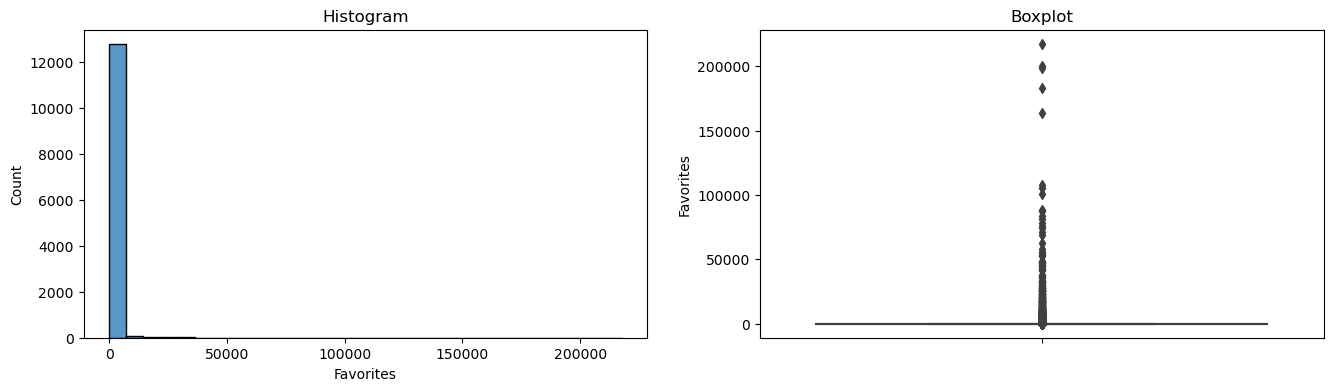


Favorites - After Capping


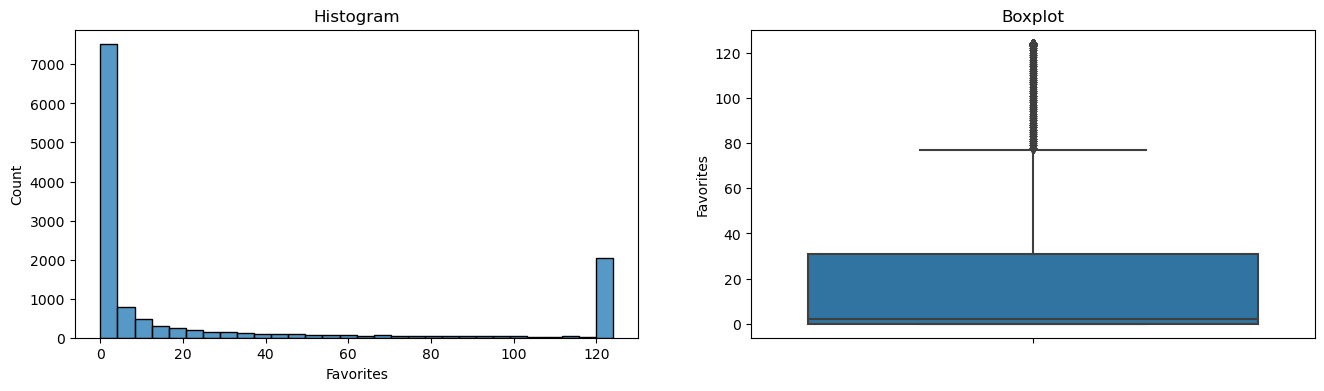

Popularity - Before Capping


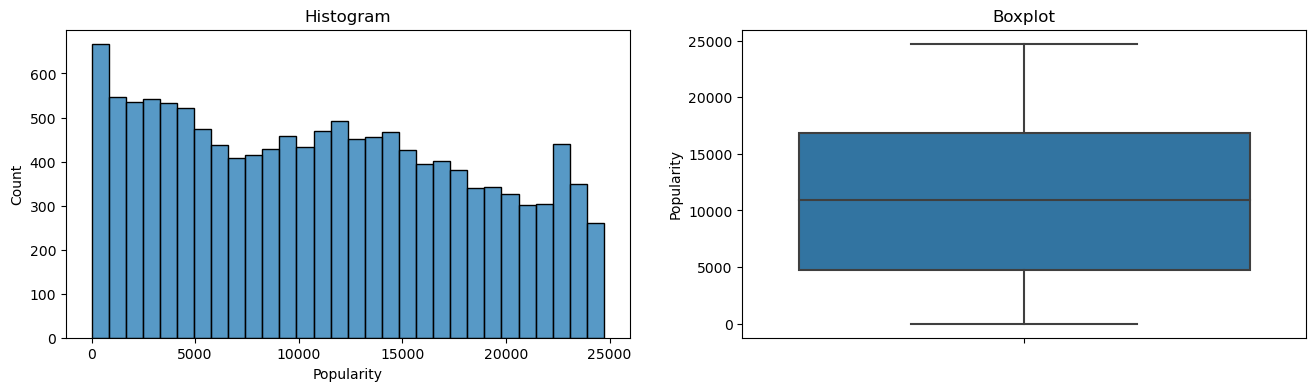


Popularity - After Capping


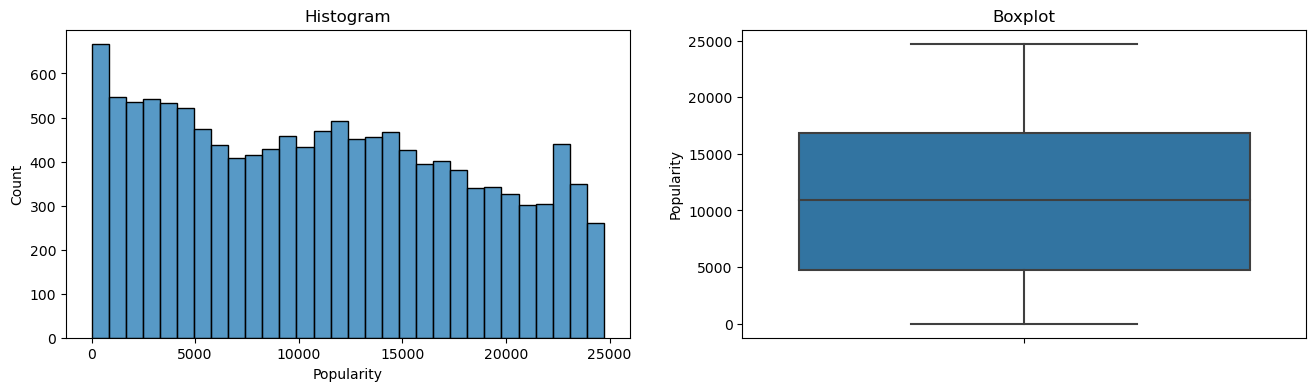

Scored By - Before Capping


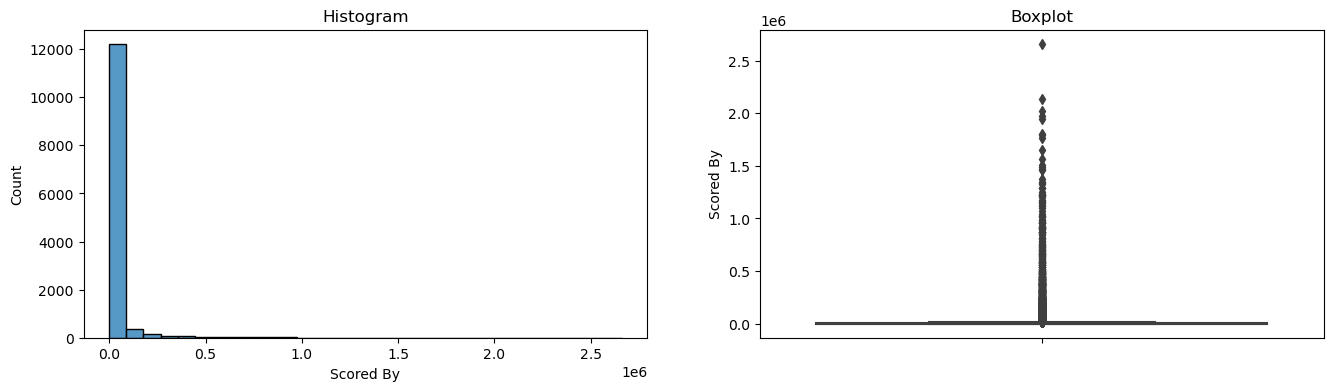


Scored By - After Capping


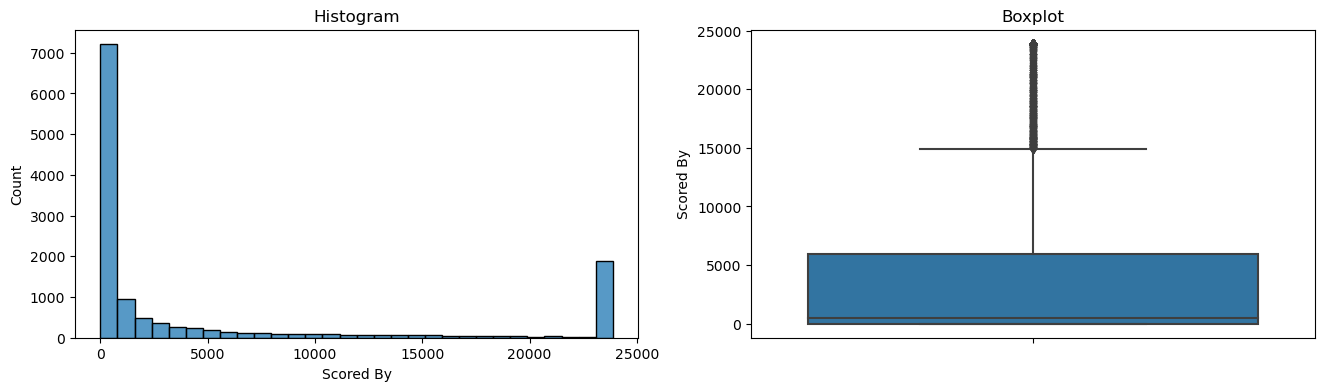

In [37]:
def hist_and_bar_plots(df, column):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column])
    plt.title('Boxplot')

    plt.show()

# Iterate over numerical columns
for col in X_train_num.columns:
    print(f'{col} - Before Capping')
    hist_and_bar_plots(X_train_num, col)

    print(f'\n{col} - After Capping')
    hist_and_bar_plots(X_train_winsorized, col)

## Splitting Num and Cat

In [38]:
#Split between num cols and cat cols
numerical_columns = X_train_winsorized.select_dtypes(include=np.number).columns.tolist() #numeric columns
categorical_columns = X_train_imputed.select_dtypes(include='object').columns.tolist() #categorical columns

#split train set into num and cat set
X_train_num = X_train_winsorized[numerical_columns]
X_train_cat = X_train_imputed[categorical_columns]

#split test set into num and cat set
X_test_num = X_test_winsorized[numerical_columns]
X_test_cat = X_test_imputed[categorical_columns]

## Scaling, Encoding and Feature Selection

Creating a pipeline for scaling, encoding and feature selection

In [39]:
# Create separate pipelines for numerical and categorical features
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', BinaryEncoder())
])

# Create a ColumnTransformer to apply different preprocessing steps to numerical and categorical columns
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, X_train_num.columns),
    ('cat', categorical_pipeline, X_train_cat.columns)])

### Feature Selection with Correlation

Let us do a feature selection by finding the correlation between the feature and the label with p-values, supporting our hypothesis that:

- $H0$: The selected feature has no correlation with the label
- $H1$: The selected feature has a correlation with the label

For numerical values, we will be using spearman due to the nature of the label being somewhat ordinal (score) while we're testing the correlation of the categorical columns with kendall

Finding Numeric Value Correlation with Spearman

In [47]:
# Split between num cols and cat cols
num_cols_winsorized = X_train_winsorized.select_dtypes(include=np.number).columns.tolist() #numeric columns

# Initialize lists to store correlation values, p-values, and hypothesis testing results
correlation_values = []
p_values = []
correlation_status = []

# Set correlation threshold (absolute value)
correlation_threshold = 0.2  # You can adjust this threshold as needed

# Set critical level (alpha) for hypothesis testing
alpha = 0.05

# Iterate over numerical columns
for column in X_train_num:
    # Perform hypothesis testing for correlation
    correlation, p_value = stats.spearmanr(X_train_winsorized[column], y_train) 
    correlation_values.append(correlation)
    p_values.append(p_value)

    # Determine correlation status based on threshold
    if abs(correlation) >= correlation_threshold:
        correlation_status.append('Yes')
    else:
        correlation_status.append('No')

# Create a new DataFrame to store results
results_df = pd.DataFrame({
    'Feature': num_cols_winsorized,
    'Correlation_Values': correlation_values,
    'P_Value': p_values,
    'Correlation?': correlation_status,
    'Hypothesis_Test_Result': np.where(np.array(p_values) < alpha, 'Reject H0', 'Fail to reject H0')  # Insert hypothesis testing result directly
})

# Round p-values to two decimal places
results_df['P_Value'] = results_df['P_Value'].apply('{:.2f}'.format)

# Filter the DataFrame to include only rows where the absolute correlation is above the threshold
filtered_results_df2 = results_df[results_df['Correlation_Values'].abs() >= correlation_threshold]

# Display the filtered DataFrame
filtered_results_df2

,Feature,Correlation_Values,P_Value,Correlation?,Hypothesis_Test_Result
0,Favorites,0.810908,0.00,Yes,Reject H0
1,Popularity,-0.832601,0.00,Yes,Reject H0
2,Scored By,0.910455,0.00,Yes,Reject H0


Finding categorical value's correlation with Kendall

In [48]:
cate_cols = X_train_imputed.select_dtypes(include='object')

cate_cols

# Create an empty list to store Kendall's tau results
kendall_tau_results = []

# Iterate over each categorical feature
for feature in cate_cols.columns:
    # Calculate Kendall's tau between the feature and the target variable
    tau, p_value = kendalltau(cate_cols[feature], y_train)
    
    # Append the results to the list
    kendall_tau_results.append({'Feature': feature,
                                'Kendall_tau': tau,
                                'P-value': p_value,
                                'Hypothesis_Test_Result': 'Reject H0' if p_value < alpha else 'Fail to reject H0'})

# Convert the list of dictionaries to a DataFrame
kendall_tau_results_df = pd.DataFrame(kendall_tau_results)

# Print the Kendall's tau results
kendall_tau_results_df

,Feature,Kendall_tau,P-value,Hypothesis_Test_Result
0,Main Genre,-0.144827,5.399408e-108,Reject H0
1,Studios,-0.291240,0.000000e+00,Reject H0
2,Rank,0.136146,3.168961e-110,Reject H0


### Numerical Features Evaluation:

The numerical features (Favorites, Popularity, Scored By) exhibit significant correlations with the label. The hypothesis tests indicate that the correlations are statistically significant, as evidenced by the low p-values (all below 0.05), leading us to reject the null hypothesis and conclude that these features are indeed correlated with the label.

### Categorical Features Evaluation:

The categorical features (Main Genre, Studios, Rank) also display significant correlations with the label. The low p-values (all close to zero) indicate that these correlations are statistically significant, leading us to reject the null hypothesis and conclude that these features are associated with the label.

### Conclusion:

Based on the evaluation, I can conclude that no features need to be excluded because all of the features are correlated with the label. Thus, we can proceed with the next step of model training with all the features.

resetting the index to tackle error after implementing binary encoder

In [ ]:
X_train_imputed.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test_imputed.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


# Model Training

In this Model Training, we will implement 5 prediction models:

- Support Vector Regressor
- K-Nearest Neighbour Regressor
- Decision Tree Regressor
- Random Forest Regressor
- XGB Classifier

SVR Model

In [ ]:
svr = SVR()

pipeline_svr = Pipeline([
    ('preprocessor', preprocessor),
    ('svr', svr)
])

K-Nearest Neighbour Regressor

In [ ]:
# KNN Regressor Pipeline
knn_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())
])

Decision Tree Model

In [ ]:
dtr = DecisionTreeRegressor()

# Decision Tree Regressor Pipeline
decision_tree_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('decision_tree', DecisionTreeRegressor())
])

Random Forest Regressor

In [ ]:
rfr = RandomForestRegressor()

# Random Forest Regressor Pipeline
random_forest_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor())
])

XGBoost Regressor

In [ ]:
xgr = XGBRegressor()

xgb_regressor = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor())
])

# Model Evaluation

Evaluating the training and testing method to identify model overfit and underfit while deciding which model works best

In [ ]:
# Train SVR model
pipeline_svr.fit(X_train_imputed, y_train)

# Train KNN model
knn_regressor.fit(X_train_imputed, y_train)

# Train Decision Tree model
decision_tree_regressor.fit(X_train_imputed, y_train)

# Train Random Forest model
random_forest_regressor.fit(X_train_imputed, y_train)

# Train XGB model
xgb_regressor.fit(X_train_imputed, y_train)

# Evaluate on training data
y_train_pred_svr = pipeline_svr.predict(X_train_imputed)
y_train_pred_knn = knn_regressor.predict(X_train_imputed)
y_train_pred_tree = decision_tree_regressor.predict(X_train_imputed)
y_train_pred_forest = random_forest_regressor.predict(X_train_imputed)
y_train_pred_xgb = xgb_regressor.predict(X_train_imputed)

train_r2_scores = [r2_score(y_train, y_train_pred_svr),
                   r2_score(y_train, y_train_pred_knn),
                   r2_score(y_train, y_train_pred_tree),
                   r2_score(y_train, y_train_pred_forest),
                   r2_score(y_train, y_train_pred_xgb)]

train_mae_scores = [mean_absolute_error(y_train, y_train_pred_svr),
                    mean_absolute_error(y_train, y_train_pred_knn),
                    mean_absolute_error(y_train, y_train_pred_tree),
                    mean_absolute_error(y_train, y_train_pred_forest),
                    mean_absolute_error(y_train, y_train_pred_xgb)]

# Evaluate on testing data
y_pred_svr = pipeline_svr.predict(X_test_imputed)
y_pred_knn = knn_regressor.predict(X_test_imputed)
y_pred_tree = decision_tree_regressor.predict(X_test_imputed)
y_pred_forest = random_forest_regressor.predict(X_test_imputed)
y_pred_xgb = xgb_regressor.predict(X_test_imputed)

test_r2_scores = [r2_score(y_test, y_pred_svr),
                  r2_score(y_test, y_pred_knn),
                  r2_score(y_test, y_pred_tree),
                  r2_score(y_test, y_pred_forest),
                  r2_score(y_test, y_pred_xgb)]

test_mae_scores = [mean_absolute_error(y_test, y_pred_svr),
                   mean_absolute_error(y_test, y_pred_knn),
                   mean_absolute_error(y_test, y_pred_tree),
                   mean_absolute_error(y_test, y_pred_forest),
                   mean_absolute_error(y_test, y_pred_xgb)]

# Create DataFrame for comparison
evaluation_results = pd.DataFrame({
    'Model': ['SVR', 'KNN', 'Decision Tree', 'Random Forest', 'XGB'],
    'Train R2 Score': train_r2_scores,
    'Test R2 Score': test_r2_scores,
    'Train MAE': train_mae_scores,
    'Test MAE': test_mae_scores
})

# Display evaluation results
evaluation_results


,Model,Train R2 Score,Test R2 Score,Train MAE,Test MAE
0,SVR,0.797166,0.772415,0.901791,0.999832
1,KNN,0.809069,0.729266,0.874899,1.056653
2,Decision Tree,1.000000,0.950494,0.000000,0.424189
3,Random Forest,0.996849,0.975832,0.106990,0.295988
4,XGB,0.988613,0.967790,0.201955,0.337036


### Evaluation Result:

Among the models evaluated, including Support Vector Regressor (SVR), K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and XGB, the __XGB Regressor__ stands out for its strong performance in both training and testing phases.

The XGB Regressor achieved a **high R2 score** of **0.988** on the training data and **0.968** on the testing data, indicating that it explains a significant portion of the variance in the target variable while avoiding overfitting. Additionally, its **Mean Absolute Error** (MAE) on the test set is **0.337**, which suggests that, on average, its predictions are off by approximately 0.337 units from the actual values.

# Hyperparameter Tuning

Implementing Hyperparameter Tuning on XGB Regressor

In [ ]:
# Define the XGBRegressor pipeline
xgb_tuning = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor())
])

# Define the hyperparameters distribution
param_dist = {
    'xgb__max_depth': [3, 5, 7, 10],
    'xgb__learning_rate': [0.05, 0.1, 0.15, 0.2],
    'xgb__n_estimators': randint(100, 1000),
    'xgb__min_child_weight': [1, 3, 5, 7],
    'xgb__gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'xgb__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb__reg_alpha': [0, 0.1, 0.5, 1.0],
    'xgb__reg_lambda': [0.1, 1.0, 5.0, 10.0]
}

# Create RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(xgb_tuning, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(X_train_imputed, y_train)

# Print the best parameters found
print("Best parameters:", random_search_xgb.best_params_)

# Get the best model
best_model_xgb = random_search_xgb.best_estimator_

# Evaluate the best model on the test data
y_pred_test_xgb = best_model_xgb.predict(X_test_imputed)

# Calculate the R2 score and MAE of the best model on the test data
r2_score_test_xgb = r2_score(y_test, y_pred_test_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)

print("R2 score on test data:", r2_score_test_xgb)
print("MAE on test data:", mae_test_xgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0.2, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__min_child_weight': 7, 'xgb__n_estimators': 661, 'xgb__reg_alpha': 1.0, 'xgb__reg_lambda': 10.0, 'xgb__subsample': 0.7}
R2 score on test data: 0.9689140876457767
MAE on test data: 0.32986715309598863


The hyperparameter tuning process resulted in a well-optimized XGB Regressor model with an R2 score of 0.969 and a Mean Absolute Error (MAE) of 0.330 on the test data.

# Model Saving

Saving the model

In [ ]:
import pickle

# Save Pipeline (including preprocessing steps and model)
with open('xgb_regressor.pkl', 'wb') as file_3:
    pickle.dump(xgb_regressor, file_3)


# Model Loading

Loading the model for inference

In [ ]:
# Load Pipeline
with open('xgb_regressor.pkl', 'rb') as file_3:
    xgb_regressor = pickle.load(file_3)

Double-checking the pipeline to make sure the pipeline has included the column transformer

In [ ]:
xgb_regressor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Favorites', 'Popularity', 'Scored By'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   BinaryEncoder())]),
                                                  Index(['Main Genre', 'Studios', 'Rank'], dtype='object'))])),
                ('xgb',
                 XGBRegressor(base_score=None, booster=None, callbacks=Non...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

# Model Inference

Creating the dummy data

In [ ]:
# Create dummy data
dummy = {
    'Name': ['Sousou no Frieren', 'Mashle: Shinkakusha Kouho Senbatsu Shiken-hen', 'Mato Seihei no Slave'],
    'Aired': ['Apr 3, 2021 to Apr 24, 2021', 'Jan 10, 2020 to Mar 28, 2020', 'Jul 15, 2019 to Dec 23, 2019'],
    'Status': ['Finished Airing', 'Currently Airing', 'Finished Airing'],
    'Studios': ['Madhouse', 'Toei Animation', 'Bones'],
    'Source': ['Manga', 'Light Novel', 'Original'],
    'Rank': [1.0, 2.0, 3.0],
    'Popularity': [1, 4200, 1150],
    'Favorites': [250000, 1500, 5500],
    'Scored By': [120000, 8000, 12000],
    'Members': [200000, 150700, 180200],
    'Main Genre': ['Action', 'Romance', 'Comedy'],
    'Sub Genre': ['Adventure', 'Drama', 'Slice of Life'],
    'Year Released': [2021, 2020, 2019]
}

# Create DataFrame
dummy_df = pd.DataFrame(dummy)

# Display DataFrame
dummy_df

,Name,Aired,Status,Studios,Source,Rank,Popularity,Favorites,Scored By,Members,Main Genre,Sub Genre,Year Released
0,Sousou no Frieren,"Apr 3, 2021 to Apr 24, 2021",Finished Airing,Madhouse,Manga,1.0,1,250000,120000,200000,Action,Adventure,2021
1,Mashle: Shinkakusha Kouho Senbatsu Shiken-hen,"Jan 10, 2020 to Mar 28, 2020",Currently Airing,Toei Animation,Light Novel,2.0,4200,1500,8000,150700,Romance,Drama,2020
2,Mato Seihei no Slave,"Jul 15, 2019 to Dec 23, 2019",Finished Airing,Bones,Original,3.0,1150,5500,12000,180200,Comedy,Slice of Life,2019


Implementing the model prediction

In [ ]:
predictions = xgb_regressor.predict(dummy_df)

Displaying the result of the model in the dataframe

In [ ]:
# Create a list of dictionaries to store the results
results = []
for anime, prediction in zip(dummy_df['Name'], predictions):
    result = {'Anime': anime, 'Predicted Score': prediction}
    results.append(result)

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Anime,Predicted Score
0,Sousou no Frieren,8.319686
1,Mashle: Shinkakusha Kouho Senbatsu Shiken-hen,7.985002
2,Mato Seihei no Slave,8.255745


The predicted scores for the anime are as follows:

- Sousou no Frieren: Predicted Score = 8.32
- Mashle: Shinkakusha Kouho Senbatsu Shiken-hen: Predicted Score = 7.99
- Mato Seihei no Slave: Predicted Score = 8.26

These scores provide an estimation of the anime's overall rating based on the provided features and the trained model.

Saving the data used for train-test to be implemented into streamlit

In [ ]:
df2.to_csv('for_streamlit.csv', index=False)

# Conclusion

**Model Analysis:**

- **Chosen Model:** Among the ensemble of regression models evaluated, the XGB Regressor emerges as the frontrunner in predicting anime scores. Its superior performance, as evidenced by the highest R2 score and lowest MAE on both training and testing datasets, signifies its robustness in capturing the underlying patterns in the data. 

- **Other Models:** Conversely, while the Decision Tree model demonstrates promising predictive capabilities, its perfect R2 score on the training set raises concerns about potential overfitting (In simpler terms, the model learns too much to the point it stresses itself out in the exam), where the model memorizes noise instead of learning generalizable patterns. 

  Random Forest, another ensemble method, presents itself as a viable alternative to XGB, albeit with slightly inferior performance metrics. Despite the marginal differences in R2 scores and MAE between Random Forest and XGB, the latter's superior performance suggests its suitability for the task of anime rating prediction. 

  Conversely, Support Vector Regressor (SVR) and K-Nearest Neighbors (KNN) exhibit comparatively weaker predictive performance, with lower R2 scores indicating their limited ability to explain the variance in the target variable.

**Business Insight:**

- **For Streaming Platform Companies:** Informed by the model analysis, streaming platforms seeking to optimize their content selection strategy should prioritize anime titles with substantial fanbases while also ensuring positive community reception. Identifying anime with a genuine positive sentiment from viewers, as opposed to those artificially inflated by fanbase-inflating tactics like excessive marketing or fanservice, can lead to more sustainable viewer engagement and satisfaction. 

- **For Manga/Manhwa Artist:** Manga/Manhwa artists looking to adapt their works into animated series should take heed of the inverse relationship between popularity and rating, recognizing that an excessively large fanbase may not always translate to favorable reception and may even detract from the overall quality perception.

**My Huggingface Deployment Advantage:**

The deployment of my predictive model on the Huggingface platform offers users a seamless experience in predicting anime scores based on their MyAnimeList data. By leveraging the platform's intuitive interface, users can effortlessly input their anime preferences and receive personalized predictions, enhancing their decision-making process. 

For Manga/Manhwa artists, the platform provides a valuable tool for defining and evaluating their own anime concepts and key performance indicators (KPIs), empowering them to gauge potential audience reception and fine-tune their creative endeavors accordingly.

**My Huggingface Deployment Disadvantage:**

While my Huggingface's space deployment offers numerous advantages, such as user-friendly prediction forms and intuitive interfaces, the potential drawback lies in the complexity of the input forms. The abundance of technical details and input parameters may overwhelm users, leading to confusion and potential errors during data entry.

**Overall Analysis:**

- **Community Reviews:** The exploration of anime rating prediction reveals valuable insights into the factors influencing viewer reception and preferences. While the majority of anime in the dataset receive moderate ratings, there exists a notable disparity, with only a small fraction achieving high acclaim. 

- **What the community watch, the community evaluates:** The observed negative correlation between popularity metrics and ratings underscores the nuanced relationship between viewer engagement and perceived quality, highlighting the need for discerning content curation and evaluation. 

- **Ratings based on the community's personal preference?:** Outliers in metrics such as favorites and scored by suggest potential biases in user scoring behavior, necessitating further investigation and validation. 

- **Concerning scores in recently released anime:** The decline in average anime scores in recent years warrants attention from industry stakeholders, signaling potential shifts in viewer expectations and content preferences. 

- **Analysis and Prediction Open to Improvement:** Despite the predictive model's notable performance, ongoing refinement efforts remain imperative, with opportunities for improvement through alternative model architectures such as linear regression, feature selection techniques such as SelectPercentile, SelectKBest, and other predictive techniques such as classification. 

# Conceptual Problems:

Explain the background of bagging and how bagging works:

Bagging is a technique in machine learning used to improve model performance. It combines predictions from multiple independently trained models and aggregates them to make a final decision. Bagging reduces overfitting and enhances prediction accuracy by leveraging the wisdom of crowds.

Explain the difference in how the Random Forest algorithm and the chosen boosting algorithm work:

Random Forest and Boosting are techniques to enhance model performance. Random Forest uses ensemble learning, where multiple decision trees vote to make a final decision. In contrast, Boosting builds models sequentially, with each one aiming to correct the errors of its predecessor. It's like learning from mistakes and striving to improve step by step.

Explain what is meant by Cross Validation:

Cross Validation is an evaluation technique to measure how well a machine learning model generalizes from training data to unseen data. It involves dividing data into folds, training the model on most of the data, and testing its performance on the remaining part. This process is repeated with different fold combinations to train and test the model multiple times. Cross Validation prevents overfitting and provides a more accurate estimate of the model's performance on unseen data.